# Predicting heart disease using Machine Learning

This notebook features various python based data science and machine learning libraries in an attempt to builda machine learning model capable of predicting whether a patient has a heart disease or not based on their medical attributes

# 1. Problem Definition

Given medical attributes about a patient, can we predict if he/she has a heart disease or not.

# 2. Data

The original data came from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

The dataset is also available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation

* What defines success?

Given the clinical parameters of a patient, if our model is able to predict if he/she has a heart disease by an accuracy of 95% then our model can be called successful

# 4. Features

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

**Data Dictionary**
1. age: age in years
2. sex: sex 
    * 1 = male 
    * 0 = female)
3. cp: chest pain type
    * 1: typical angina
    * 2: atypical angina
    * 3: non-anginal pain
    * 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * 1: upsloping
    * 2: flat
    * 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing



# Tools to be used

Using Pandas, NumPy and Matplotlib for data analysis and manipulation.

In [263]:
#Importing the tools we need 

#EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

#Models from Scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evalution Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report , precision_score 
from sklearn.metrics import f1_score , recall_score , plot_roc_curve

# Load Data

In [264]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration (EDA)

In [265]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [266]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

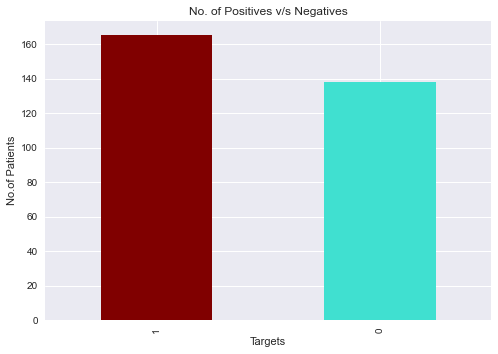

In [267]:
df['target'].value_counts().plot(kind='bar', 
                                 color = ['maroon' , 'turquoise'],
                                 title = 'No. of Positives v/s Negatives',
                                 xlabel = 'Targets',
                                 ylabel = 'No.of Patients');

The above bar plot shows the number of each classes of the `target` variable we have in out dataset.

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We don't have any string based columns hence we won't be needing to convert any string based data to numbers.

In [269]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We don't have any missing values in the dataset.

In [270]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [271]:
#Finding patterns in the dataset

In [272]:
#Comapring sex parameter with our target parameter
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [273]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


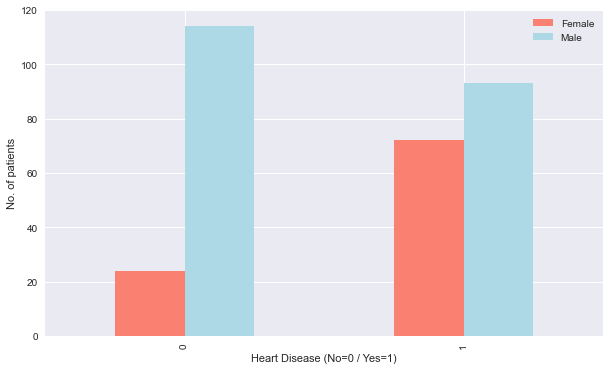

In [274]:
pd.crosstab(df['target'] , df['sex'] ).plot(kind='bar',
                                           xlabel = 'Heart Disease (No=0 / Yes=1)',
                                           ylabel = 'No. of patients',
                                           color = ['salmon' , 'lightblue'],
                                           figsize= (10,6),
                                           ylim = (0,120));
plt.legend(['Female' , 'Male'])

The above graph indicates that in our dataset, females are much more likely to have a heart disease than males.

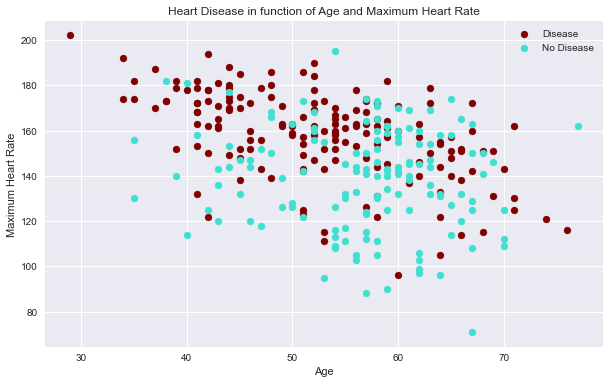

In [275]:
#Comparing 'age' with 'thalach' (i.e max heart rate))
# for patients having heart disease 
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , color = 'maroon');

# for patients not having heart disease
plt.scatter(df.age[df.target==0] , df.thalach[df.target==0], color='turquoise');
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Heart Disease in function of Age and Maximum Heart Rate')
plt.legend(['Disease' ,'No Disease'])

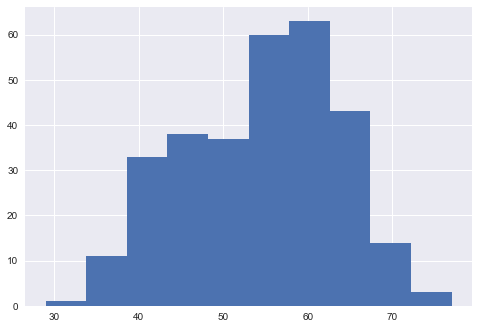

In [276]:
#Checking distribution of age with a histogram
plt.hist(df.age);

**Heart Disease Frequency per chest pain type**

cp: chest pain type
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic


In [277]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


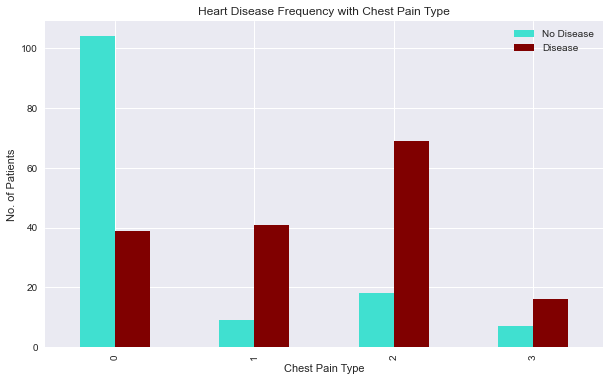

In [278]:
pd.crosstab(df.cp,df.target).plot(kind='bar', color = ['turquoise' ,'maroon'] , figsize=(10,6))
plt.legend(['No Disease' , 'Disease'])
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of Patients')
plt.title('Heart Disease Frequency with Chest Pain Type');

In [279]:
#Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


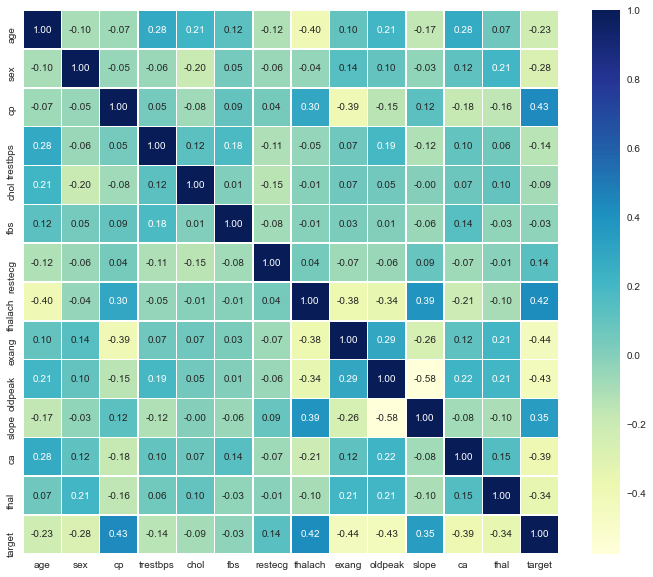

In [280]:
ax, fig = plt.subplots(figsize=(12,10))
ax = sns.heatmap(df.corr() , annot=True , linewidths=0.5, fmt = ".2f" , cmap = "YlGnBu")

# Model Evaluation

In [281]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [282]:
#Sperating all the medical parameters with the target column

X = df.drop('target' , axis=1)
y = df['target']

In [283]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [284]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [285]:
#Splitting X and y into training and testing data
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)
len(X_train) , len(y_train) , len(X_test) , len(y_test) 


(242, 242, 61, 61)

**Building a machine learning model**
After splitting the data in training and testing datasets now, we are going to
* train the dataset (finding patterns) using the training set
* and test is (using those patterns) on the testing set

Trying 3 different models
* Logistic Regression
* K-Nearest Neigbors Classifier
* Random Forest Classifier



In [286]:
#Putting all the models in a dictionary
np.random.seed(42)
models = {'LogisticRegression' : LogisticRegression(),
          'K-Nearest Neighbors Classifier' : KNeighborsClassifier(),
          'Random Forest Classifier' : RandomForestClassifier()}

#Creating an empty dictionary for all the model scores
results = {}

#Defining function to fit and score models 
def fit_score_models(model, X_train,y_train, X_test, y_test):
    """
    model = model to be used to train and test the data 
    X_train = training dataset that includesall the medical parameters
    y_train = training dataset consisting of the target column
    X_test = testing dataset that includes all the medical parameters
    y_test = testing dataset consisting of the target column
    
    """
    #looping to fit and score the models
    for model_name , model in models.items():
        print(f'Fitting {model_name} model...')
        #fitting the model to training data
        model.fit(X_train,y_train)
    
        #evaluate the model and append it's scores in the results dictionary
        print(f'Scoring {model_name} model...')
        results[model_name] = model.score(X_test,y_test)

    return results

    
    

In [287]:
fit_score_models(models,X_train,y_train, X_test, y_test)


Fitting LogisticRegression model...
Scoring LogisticRegression model...
Fitting K-Nearest Neighbors Classifier model...
Scoring K-Nearest Neighbors Classifier model...
Fitting Random Forest Classifier model...


C:\Users\dell\Desktop\ML and DS\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scoring Random Forest Classifier model...


{'LogisticRegression': 0.8852459016393442,
 'K-Nearest Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [288]:
#Comparing accuracy of all the used models
compare_models = pd.DataFrame(results , index = ['Accuracy'])

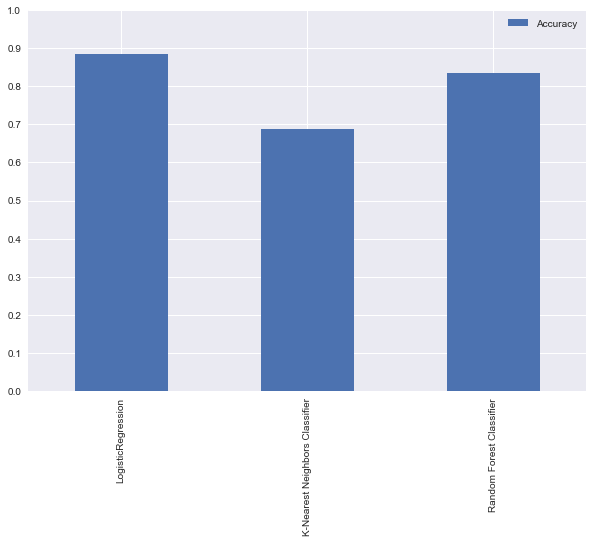

In [289]:
compare_models.T.plot(kind='bar' , figsize = (10,7) , yticks = np.arange(0,1.1,0.1));

Now that our baseline models are ready, we are going to do the following

* Hyperparameter Tuning
* Feature Importance
* F1 score
* Recall
* Precision
* Confusion_matrix
* Cross Validation
* Classification Report
* ROC Curve
* Area under ROC Curve (AUC)





## Hyperparameter Tuning

In [290]:
#Tuning our K Nearest Neighbors Classifier model  

train_score = []
test_score = []

#Creating a list of different K values for KNN model
neighbors = range(1,21)

#Setup knn instance
knn = KNeighborsClassifier()

#looping for model to work with different paramters
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fitting the model
    knn.fit(X_train,y_train)
    
    #appending model score in the train_score and test_score list
    train_score.append(knn.score(X_train,y_train))
    test_score.append(knn.score(X_test,y_test))


In [291]:
train_score , test_score 

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum score on test data by knn model is 75.41%


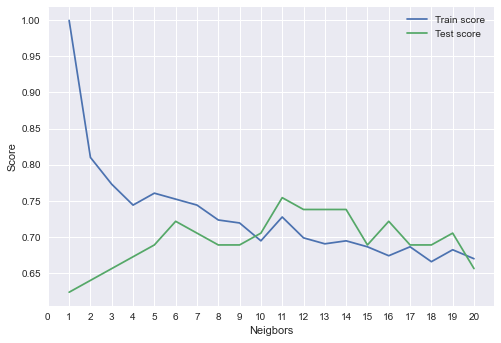

In [292]:
plt.plot(neighbors , train_score)
plt.plot(neighbors , test_score)
plt.legend(['Train score' , 'Test score'])
plt.xticks(range(0,21));
plt.xlabel('Neigbors')
plt.ylabel('Score');
 
print(f"Maximum score on test data by knn model is {max(test_score)*100:.2f}%")

We increased the score of K-Nearest Neigbors model from 68% to 75% but it still is not anywhere close to our goal. i.e 95% 

Hence we'll be using a different model.

# Hyperparameter Tuning using RandomizedSearchCV

We'll be tuning-

* Logistic Regression
* Random Forest Classifier

...using RandomizedSearchCV

In [293]:
# Creating hyperparamter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ['liblinear']
                }
# Creating hypterparamter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,1000,10),
            "max_depth" : [None,3,5,10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : np.arange(1,20,2)
           }

In [294]:
#Tuning Logistic Regression

np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fitting random hyperparameter random search model
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [295]:
#Getting best parameter for hyperparameter grid search models
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [296]:
#Checkingg the score for the best hyperparameters
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [297]:
#Setting up Random hyperparameters for RandomForestClassifier  
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv=5,
                          n_iter = 20,
                          verbose=True)

#Fitting Random hyperparameter model
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [298]:
#Getting best parameter for random hyperparameter RandomForestClassifier model
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': None}

In [299]:
#Finding score for the best paramters 
rs_rf.score(X_test,y_test)

0.8688524590163934

In [300]:
#Setting up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True) 
#Fitting grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [301]:
#Checking the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [302]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating our tuned model beyond accuracy

* confusion matrix
* roc curve
* classification report
* recall
* f1 score
* precision


In [303]:
y_preds = gs_log_reg.predict(X_test)

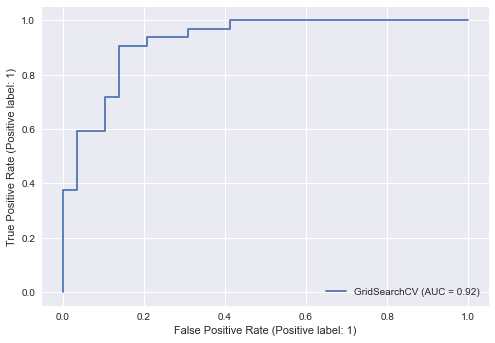

In [304]:
#Plotting ROC curve and calculating AUC
plot_roc_curve(gs_log_reg , X_test , y_test)


In [305]:
#Plotting a confusion matrix

con_mat = confusion_matrix(y_test, y_preds)
con_mat

array([[25,  4],
       [ 3, 29]], dtype=int64)

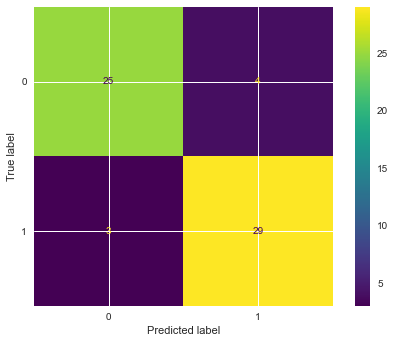

In [306]:

plot_confusion_matrix(gs_log_reg , X_test, y_test)


In [307]:
#Calculating precision, recall f1-score, macro average and weighted average

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculating evaluation metrics using Cross Validation

Previously precision, recall and f1-score were calculated on just one test dataset. Now we'll be doing it using cross validation.

In [308]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [309]:
clf = LogisticRegression(C = 0.23357214690901212, solver = 'liblinear')

In [310]:
cv_acc = np.mean(cross_val_score(clf ,  X, y , scoring = 'accuracy'))
cv_pre = np.mean(cross_val_score(clf , X , y , scoring = 'precision'))
cv_rec = np.mean(cross_val_score(clf , X , y , scoring = 'recall'))
cv_f1 = np.mean(cross_val_score(clf , X , y , scoring = 'f1'))

In [311]:
cv_report = pd.DataFrame({'Accuracy' : cv_acc , 
             'Precision': cv_pre , 
             'Recall' : cv_rec ,
             'F1-score' :cv_f1} , index = [0])
cv_report

,Accuracy,Precision,Recall,F1-score
0,0.847978,0.821587,0.927273,0.87054


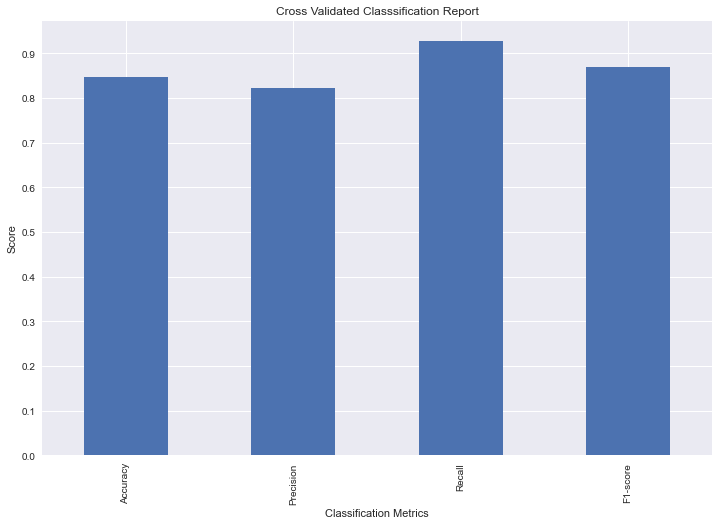

In [312]:
cv_report.T.plot(kind='bar' , 
                 title = 'Cross Validated Classsification Report' , 
                 xlabel = 'Classification Metrics' ,
                 ylabel = 'Score',
                 legend = False,
                 figsize = (12,8),
                 yticks = np.arange(0,1,0.1));

# Feature Importance

Here we will look into the features which contributed the most in predicting the heart disease and how. 

In [313]:
#Checking the best parameters for grid hyperparameter search model 
gs_log_reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [314]:
#Fitting the best hyperparameter tuned model
clf = LogisticRegression(C = 0.23357214690901212, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [315]:
#Creating a dictionary that includes 
coef_dict = dict(zip((df.columns) , list(clf.coef_[0])))
coef_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [316]:
coef_df = pd.DataFrame(coef_dict , index = [0])

In [317]:
coef_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.575909,0.470951,-0.651654,-0.699842


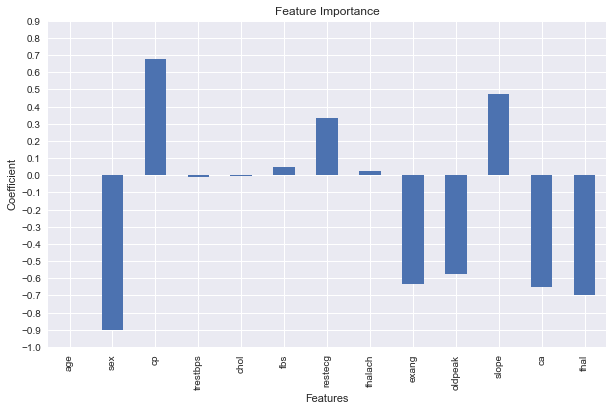

In [318]:
coef_df.T.plot.bar(title = 'Feature Importance', 
                   xlabel = 'Features',
                   ylabel = 'Coefficient',
                   legend = False,
                   figsize= (10,6),
                   yticks = np.arange(-1,1,0.1));

# Conclusion

Unfortunately, we were not able to acheive our goal (i.e for our model to predict the heart disease with 95% accuracy) but we came close enough with an accuracy of 88.52% using our modified Logistic Regression model (Modications involved Cross Validated Grid searching to find the best set of hyperparameters).

Now furthur to improve the accuracy the following can be done-
* We can collect more data
* We can try using some other model that may have better accuracy.
* We can tune our current model with a different and a larger set of hyperparameters.
